In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
m = 100
x1 = 10 * np.random.rand(m,1) - 6 
y = 10 + 6 * x1 + 5 * x1**2 + 30 *np.random.randn(m,1)

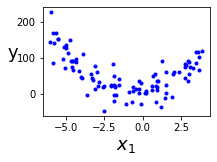

In [4]:
plt.figure(figsize=(3,2))
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation = 0, fontsize=18)
plt.show()

In [5]:
#split 訓練集/測試集

from sklearn.model_selection import train_test_split
x1_train,x1_test, y_train, y_test = train_test_split(x1,y, test_size=0.2, random_state=1)

In [6]:
#Ridge Regression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [7]:
from sklearn.linear_model import Ridge
ridge_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('ridge', Ridge(alpha=m/2, random_state=1))
])
ridge_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', Ridge(alpha=50.0, random_state=1))])

In [8]:
ridge_reg.score(x1_train, y_train), ridge_reg.score(x1_test, y_test)

(0.5624715988861847, 0.5000997386648433)

In [9]:
ridge_reg.predict(x1_test[:3])

array([[50.49773754],
       [59.13869604],
       [31.86781274]])

In [15]:
#SGDRegressor

from sklearn.linear_model import SGDRegressor
ridge_sgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('ridge', SGDRegressor(penalty='l2', alpha=1, random_state=1))
])
ridge_sgd.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', SGDRegressor(alpha=1, random_state=1))])

In [16]:
ridge_sgd.score(x1_train, y_train), ridge_sgd.score(x1_test, y_test)

(0.48914255940966433, 0.4132817374249068)

In [17]:
ridge_sgd.predict(x1_test[:3])

array([47.78375855, 58.58856714, 35.37888686])

In [40]:
#繪製模型

def plot_model(model, x1, y):
    x1s = np.linspace(x1.min(), x1.max(), 1000).reshape(-1,1)
    y_pred = model.predict(x1s)
    
    plt.plot(x1_train, y_train, 'b.', markersize=3)
    plt.plot(x1_test, y_test, 'gx', markersize=3)
    plt.plot(x1s, y_pred, "r-", linewidth=2, label="$\hat y$")
    
    plt.xlabel("$X_1$", fontsize=18)
    plt.ylabel("y", rotation=0, fontsize=18)
    plt.legend(loc="upper center", fontsize=10)
    plt.axis([x1.min()-0.1, x1.max()+0.1, y.min()-5, y.max()+5])

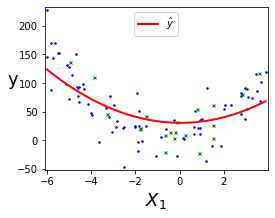

In [41]:
plt.figure(figsize=(4,3))
plot_model(ridge_reg, x1, y)
plt.show()

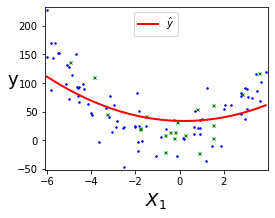

In [42]:
plt.figure(figsize=(4,3))
plot_model(ridge_sgd, x1, y)
plt.show()

In [30]:
#Lasso

from sklearn.linear_model import Lasso
lasso_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('lasso', Lasso(alpha=1, random_state=1))
])
lasso_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=1))])

In [32]:
lasso_reg.score(x1_train, y_train), lasso_reg.score(x1_test, y_test)

(0.7289049773635354, 0.7090703555227444)

In [33]:
lasso_reg.predict(x1_test[:3])

array([63.93127861, 47.72171974,  7.57641004])

In [36]:
from sklearn.linear_model import SGDRegressor

lasso_sgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('lasso', SGDRegressor(penalty='l1', alpha=1, random_state=1))
])
lasso_sgd.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', SGDRegressor(alpha=1, penalty='l1', random_state=1))])

In [37]:
lasso_sgd.score(x1_train, y_train), lasso_sgd.score(x1_test, y_test)

(0.7284890196449929, 0.7089179245883366)

In [38]:
lasso_sgd.predict(x1_test[:3])

array([63.65542504, 47.90341769,  7.82005821])

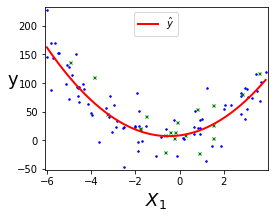

In [43]:
plt.figure(figsize=(4,3))
plot_model(lasso_reg, x1, y)
plt.show()

In [45]:
#ElasticNet()

from sklearn.linear_model import ElasticNet
elastic_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('elastic', ElasticNet(alpha=1, l1_ratio=0.5, random_state=1))
])
elastic_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=1))])

In [46]:
elastic_reg.score(x1_train, y_train), elastic_reg.score(x1_test, y_test)

(0.5863340512948914, 0.5331573407141718)

In [47]:
elastic_reg.predict(x1_test[:3])

array([50.69422872, 58.62751416, 29.73199465])

In [49]:
from sklearn.linear_model import SGDRegressor

elastic_sgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('elastic', SGDRegressor(penalty='l2', l1_ratio=0.5, alpha=1, random_state=1))
])
elastic_sgd.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic',
                 SGDRegressor(alpha=1, l1_ratio=0.5, random_state=1))])

In [50]:
elastic_sgd.score(x1_train, y_train), elastic_sgd.score(x1_test, y_test)

(0.48914255940966433, 0.4132817374249068)

In [51]:
elastic_sgd.predict(x1_test[:3])

array([47.78375855, 58.58856714, 35.37888686])

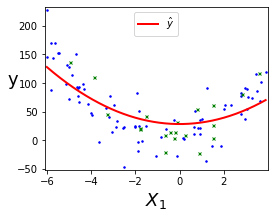

In [52]:
plt.figure(figsize=(4,3))
plot_model(elastic_reg, x1, y)
plt.show()